In [88]:
import pandas as pd
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

# setting up file variables
file_path = "Data/Folkhalsomyndigheten_Covid19.xlsx"
sheet = "Veckodata Riket"

# reading file to a dataframe
df = pd.read_excel(file_path, sheet_name = sheet)

df.head()


,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


---
a) Initial data analysis

In [89]:
# TODO other analysis

In [90]:
df.info() # datatypes are all numbers, not missing any values, looks good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

---
b) add columns "år" and "veckonummer" to a column "vecka" in the following format: YYYYvW


In [91]:
# creating new column "Vecka" of strings from "år" and "veckonummer" separated by "v", and inserting it at position 0 of the dataframe
df.insert(0, "Vecka", df["år"].astype(str) + "v" + df["veckonummer"].astype(str)) # taking column values as string in order to get the correct datatype
df.drop(['år', 'veckonummer'], axis = 1, inplace = True)
df.head() # results in column with format YYYYvW

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


---
Using both Seaborn and Plotly Express:  
c) Draw a line chart of deceased per week from 2020v6 until present  
d) Draw a line chart of new cases per week from 2020v6 until present  
e) Draw a line chart of deceased per week and new cases per week from 2020v6 until present  
f) Draw a line chart of cumulative amount cases from 2020v6 until present

## 2x2 plot using Seaborn

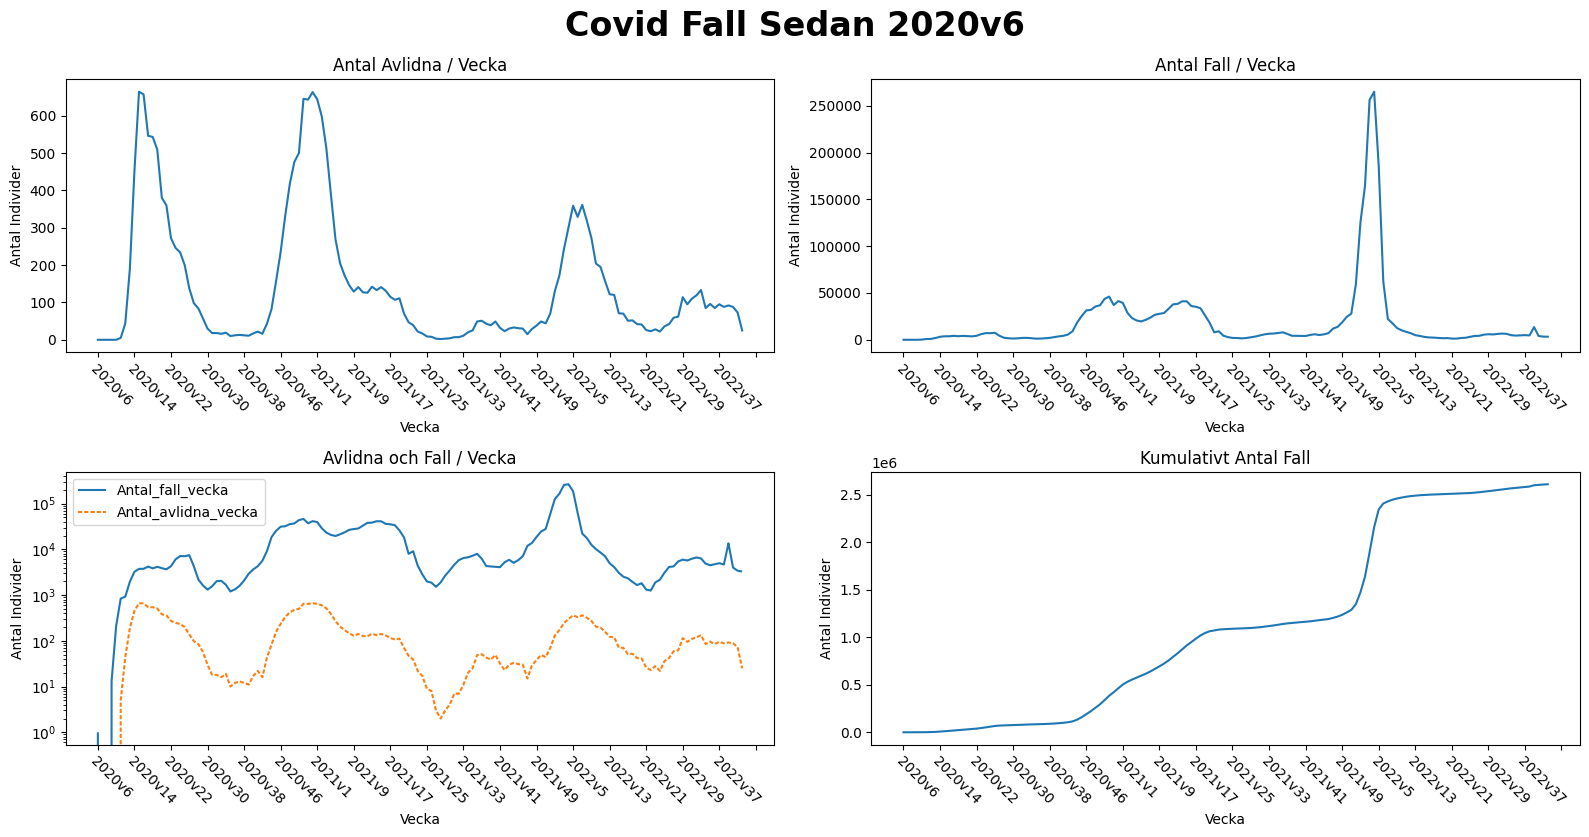

In [92]:
fig, axes = plt.subplots(2,2, figsize = (16, 8))

titles = ["Antal Avlidna / Vecka", "Antal Fall / Vecka", "Avlidna och Fall / Vecka", "Kumulativt Antal Fall"]
series = ["Antal_avlidna_vecka", "Antal_fall_vecka", ["Antal_fall_vecka", "Antal_avlidna_vecka"], "Kum_antal_fall"]

for ax, index, title in zip(axes.flatten(), series, titles):
    if isinstance(index, list):
        for i, serie in enumerate(index): # i used for ensuring different visuals of each graph input
            sns.lineplot(df, x = "Vecka", y = serie, ax = ax, label = serie, dashes = [i + 1, i])
        ax.set_yscale("log")
    else:
        sns.lineplot(df, x = "Vecka", y = index, ax = ax)
    
    ax.set_title(title)
    ax.set_ylabel("Antal Individer")
    ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # showing 20 tick labels
    ax.xaxis.set_tick_params(rotation=-45) # draws ticks at bottom of x axis with rotation
    plt.setp(ax.get_xticklabels(), ha="left", rotation_mode="anchor") # anchor left part of label to tick

fig.tight_layout()
fig.suptitle("Covid Fall Sedan 2020v6", fontsize = 24, fontweight = "bold", y = 1.04);

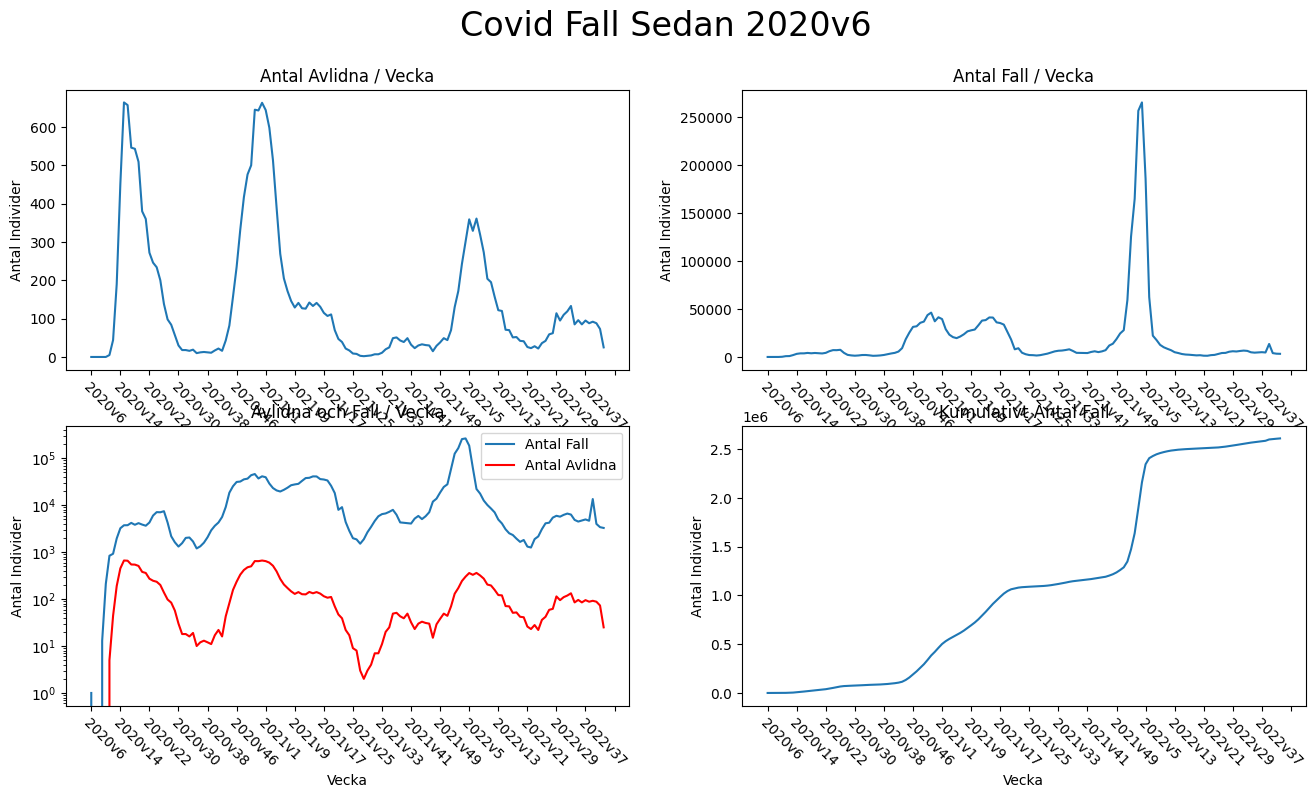

In [93]:
fig, axes = plt.subplots(2,2, figsize = (16, 8), constrained_layout = False)

titles = ["Antal Avlidna / Vecka", "Antal Fall / Vecka", "Avlidna och Fall / Vecka", "Kumulativt Antal Fall"]
y_lables = ["Antal Individer"] * 4

sns.lineplot(df, x = "Vecka", y = "Antal_avlidna_vecka", ax = axes[0, 0])
sns.lineplot(df, x = "Vecka", y = "Antal_fall_vecka", ax = axes[0, 1])
sns.lineplot(df, x = "Vecka", y = "Antal_fall_vecka", ax = axes[1, 0], label = "Antal Fall")
sns.lineplot(df, x = "Vecka", y = "Antal_avlidna_vecka", ax = axes[1, 0], label = "Antal Avlidna", color = "red")
axes[1, 0].set_yscale('log')
sns.lineplot(df, x = "Vecka", y = "Kum_antal_fall", ax = axes[1, 1])

for ax, title, y_label in zip(axes.reshape(-1), titles, y_lables):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # showing 20 tick labels
    ax.xaxis.set_tick_params(rotation=-45) # draws ticks at bottom of x axis with rotation
    plt.setp(ax.get_xticklabels(), ha="left", rotation_mode="anchor") # anchor left part of label to tick

fig.suptitle("Covid Fall Sedan 2020v6", fontsize = 24);
# TODO save fig

## Plotting with Plotly Express

In [94]:
# TODO titles and labels

In [95]:
px.line(df, x = "Vecka", y = "Antal_avlidna_vecka")

In [96]:
px.line(df, x = "Vecka", y = "Antal_fall_vecka")

In [97]:
px.line(df, x = "Vecka", y = ["Antal_avlidna_vecka", "Antal_fall_vecka"], log_y = True)

In [98]:
px.line(df, x = "Vecka", y = "Kum_antal_fall")
